In [5]:
import neo
import quantities as pq
import matplotlib.pyplot as plt
from neurodsp.plts import plot_time_series, plot_power_spectra
from neurodsp.spectral import compute_spectrum_welch
from fooof import FOOOF
from utils import *

In [6]:
# function that load the ibw data with correct times and sampling rate
def load_data(path):
    reader = neo.io.IgorIO(filename=path)
    block = reader.read_block()
    assert len(block.segments)==1
    assert len(block.segments[0].analogsignals)==1
    signal = block.segments[0].analogsignals[0]

    sig_new = neo.AnalogSignal(signal, 
                               sampling_rate=1000.*pq.Hz,
                               times=(signal.times.magnitude/1000.)*pq.s,
                               t_start = signal.t_start,
                               t_stop = (signal.t_stop.magnitude/1000.)*pq.s)


    return sig_new

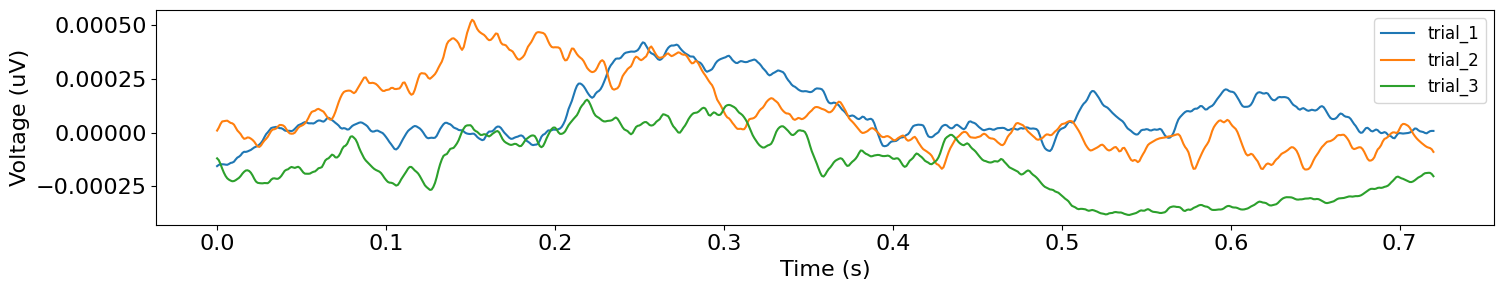

In [12]:
signal = load_data('data/c24_09_single_trials(visually-evoked)/lfp123_stim.ibw')
signal_filtered_trial0 = filter_line_noise(signal.magnitude.T[0], 1000, 550)
signal_filtered_trial1 = filter_line_noise(signal.magnitude.T[1], 1000, 550)
signal_filtered_trial2 = filter_line_noise(signal.magnitude.T[2], 1000, 550)
signal_filtered_trial3 = filter_line_noise(signal.magnitude.T[3], 1000, 550)

plot_time_series(signal.times, [signal_filtered_trial0, signal_filtered_trial1, signal_filtered_trial2], labels=['trial_1', 'trial_2', 'trial_3'])

/opt/miniconda3/envs/neuro/lib/python3.9/site-packages/scipy/signal/_spectral_py.py:1999: UserWarning: nperseg = 1000 is greater than input length  = 721, using nperseg = 721
  warnings.warn('nperseg = {0:d} is greater than input length '


Text(0.5, 1.0, 'Unfiltered PSD')

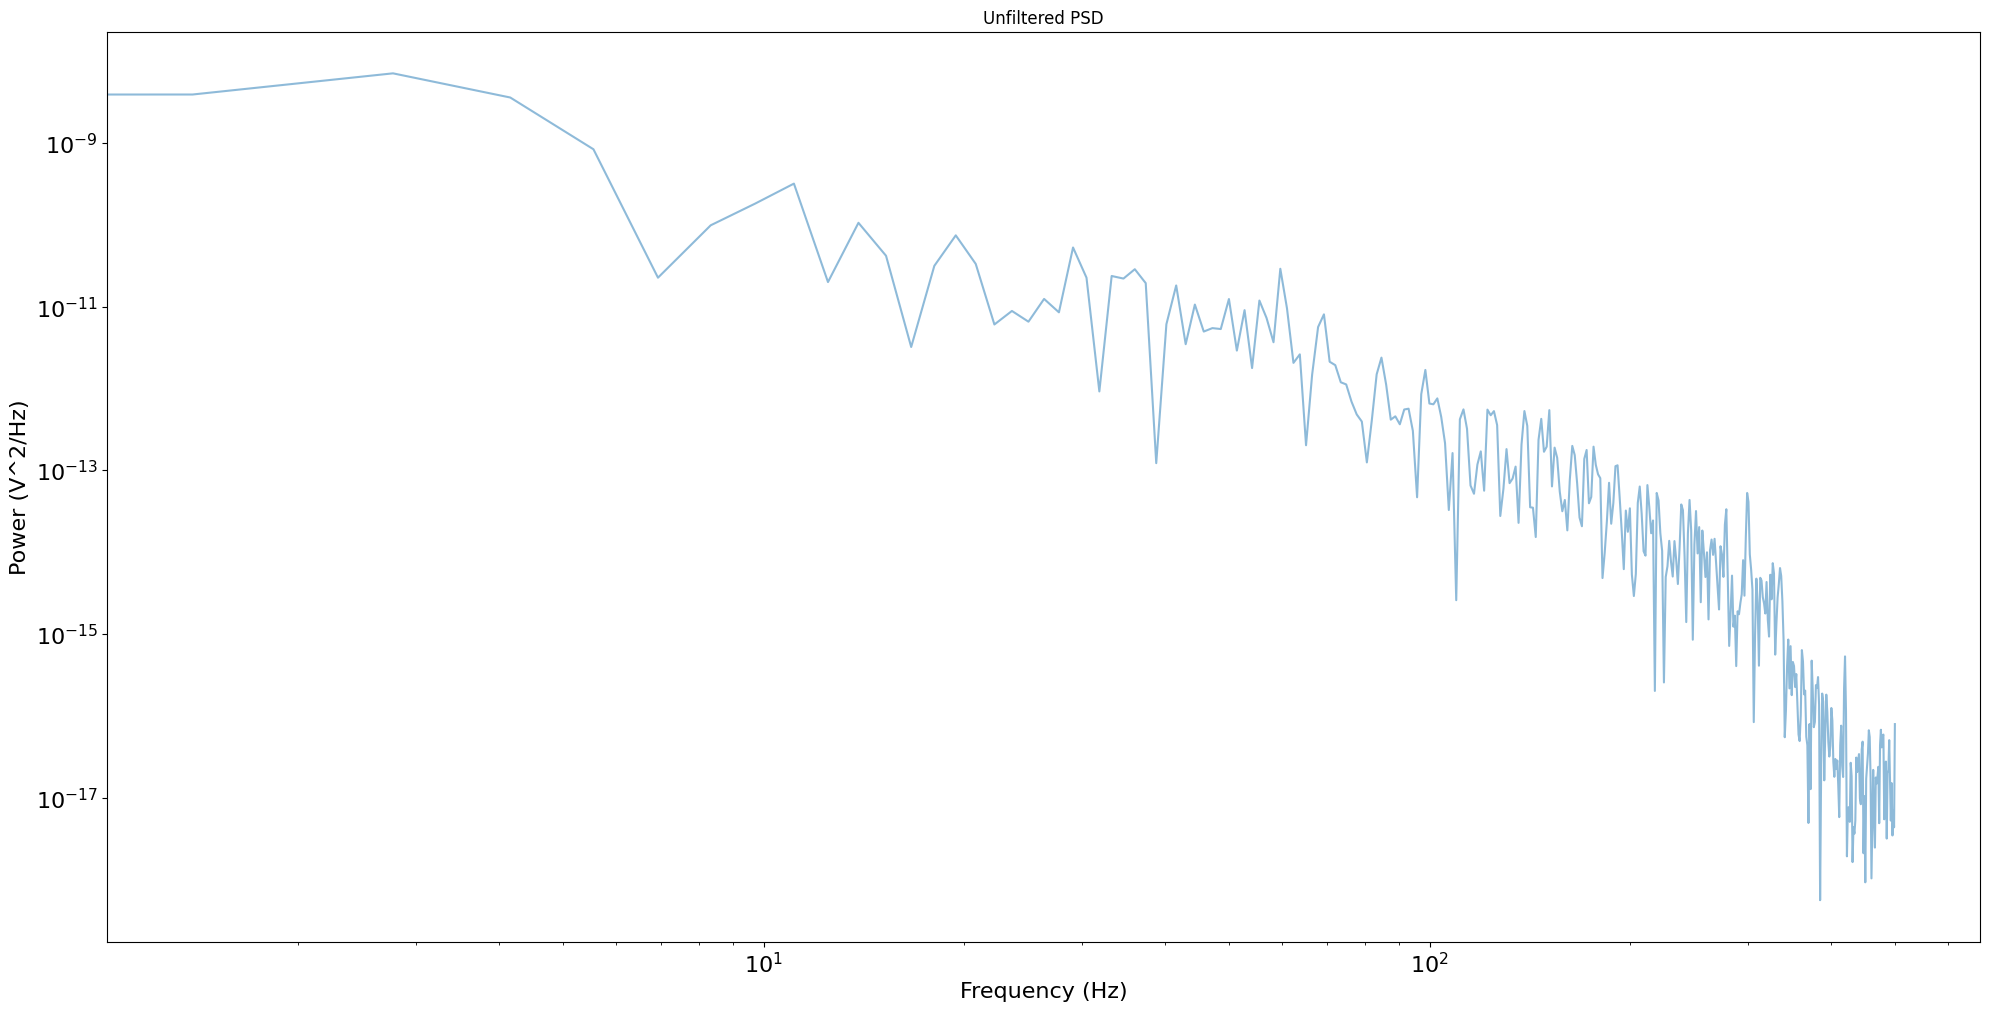

In [10]:
# plot filtered and unfiltered time series
plt.figure(figsize=(20, 10))
# plt.subplot(2, 1, 1)
freqs, powers = compute_spectrum_welch(signal_filtered_trial0, fs=1000)
# plot the raw PSD
plot_power_spectra(freqs, powers, color='Blue', alpha=0.50, ax=plt.gca(), label='Raw')
# psd, freqs = plt.psd(ts_1st_probe[0], Fs=1000)
plt.title('Unfiltered PSD')

/opt/miniconda3/envs/neuro/lib/python3.9/site-packages/scipy/signal/_spectral_py.py:1999: UserWarning: nperseg = 1000 is greater than input length  = 721, using nperseg = 721
  warnings.warn('nperseg = {0:d} is greater than input length '
/opt/miniconda3/envs/neuro/lib/python3.9/site-packages/scipy/signal/_spectral_py.py:1999: UserWarning: nperseg = 1000 is greater than input length  = 721, using nperseg = 721
  warnings.warn('nperseg = {0:d} is greater than input length '
/opt/miniconda3/envs/neuro/lib/python3.9/site-packages/scipy/signal/_spectral_py.py:1999: UserWarning: nperseg = 1000 is greater than input length  = 721, using nperseg = 721
  warnings.warn('nperseg = {0:d} is greater than input length '



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 1.39 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 1.39 Hz                                  
                                                                         

/opt/miniconda3/envs/neuro/lib/python3.9/site-packages/scipy/signal/_spectral_py.py:1999: UserWarning: nperseg = 1000 is greater than input length  = 721, using nperseg = 721
  warnings.warn('nperseg = {0:d} is greater than input length '


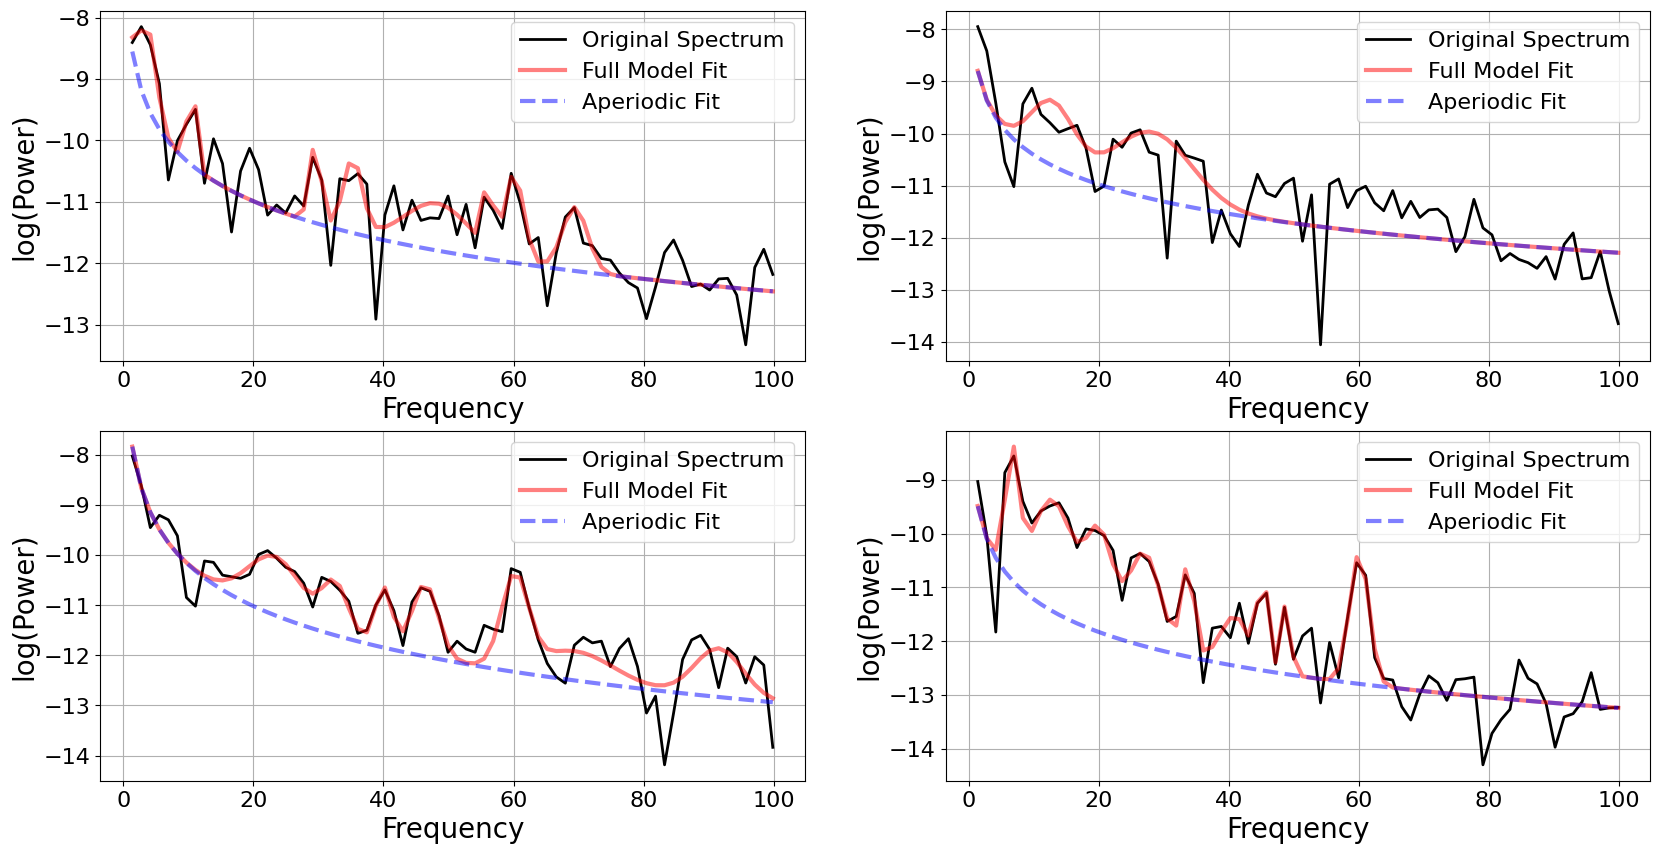

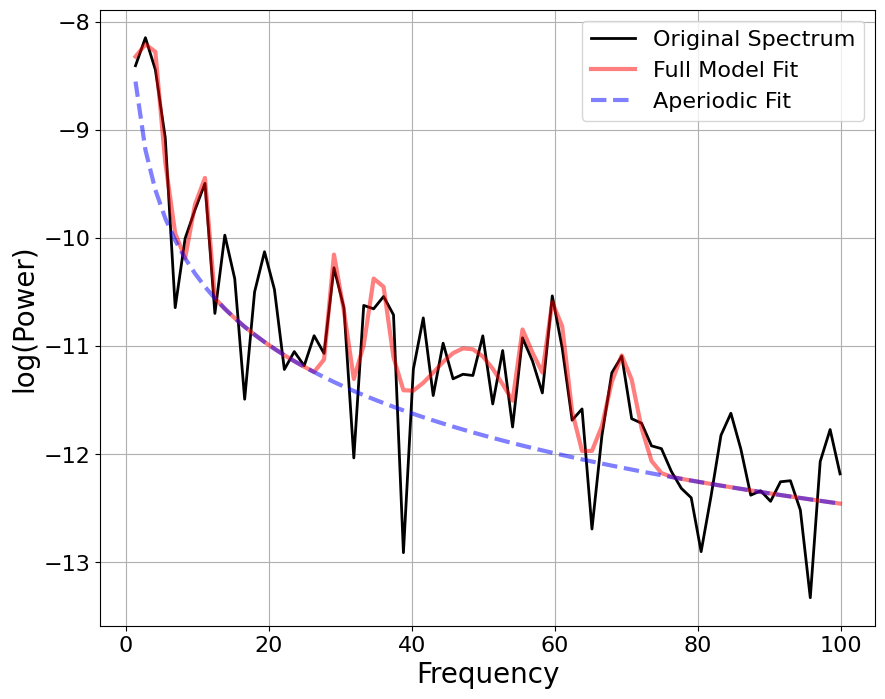

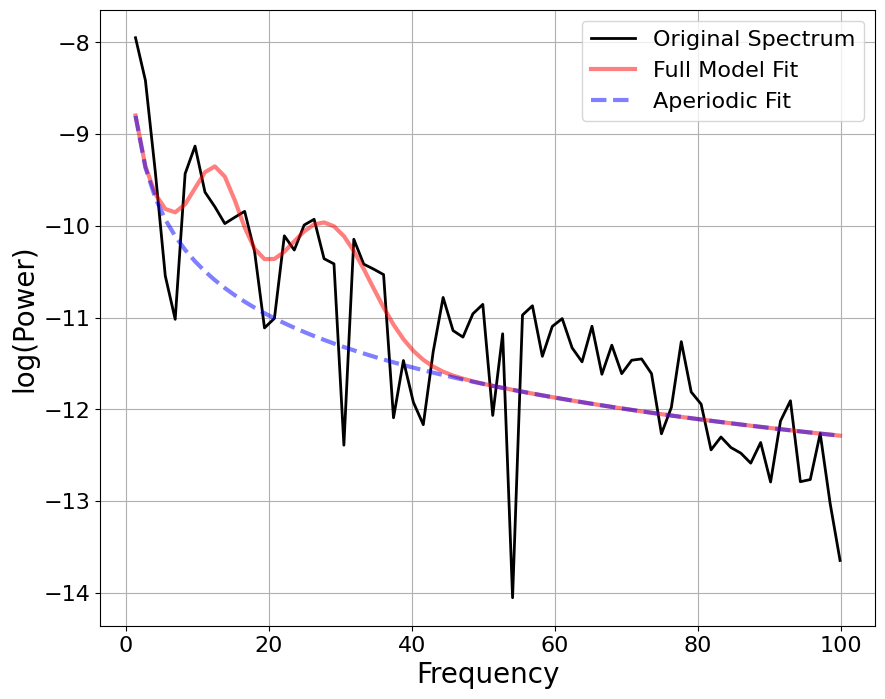

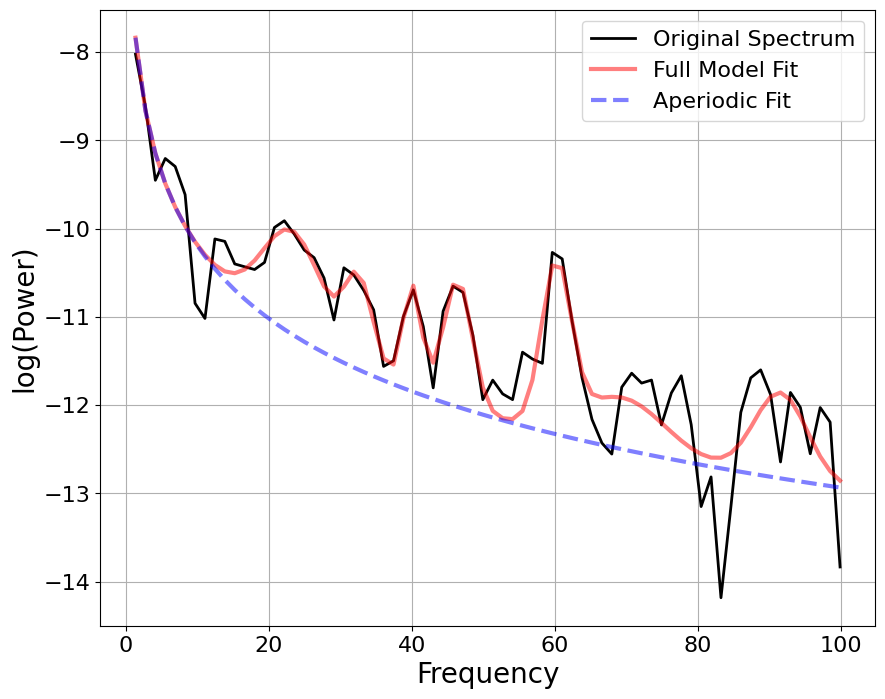

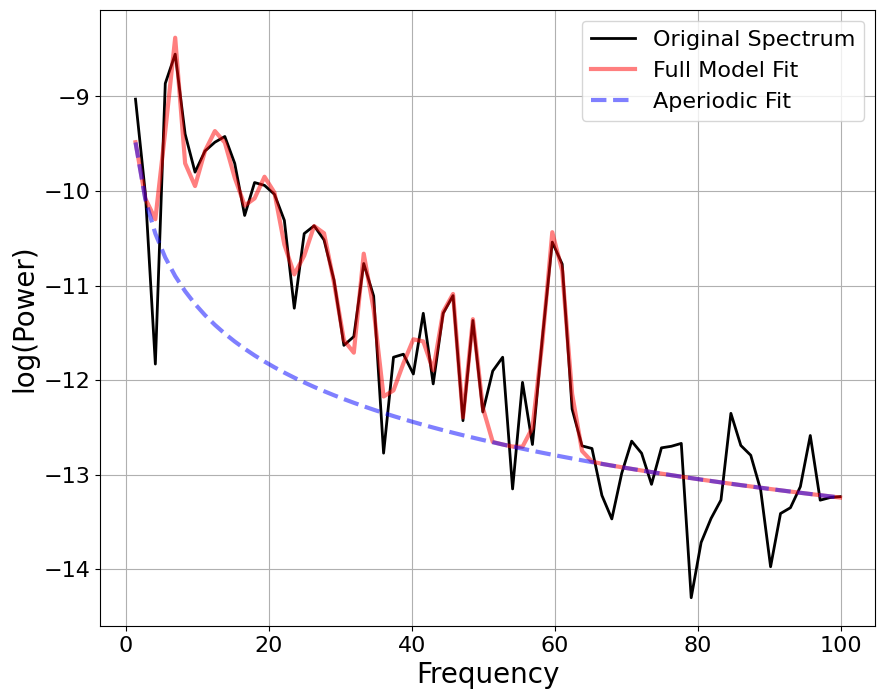

In [16]:
trials = [signal_filtered_trial0, signal_filtered_trial1, signal_filtered_trial2, signal_filtered_trial3]
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

for trial, ax in zip(trials, axs.flatten()):
    # Initialize a FOOOF object
    fm = FOOOF()

    # Compute a power spectrum
    freqs, powers = compute_spectrum_welch(trial, fs=1000)

    # Set the frequency range to fit the model
    freq_range = [0, 100] # what freqs range shoul I use? 

    # Report: fit the model, print the resulting parameters, and plot the reconstruction
    fm.report(freqs, powers, freq_range)
    fm.plot(ax=ax)